# Introduction

This analysis is performed with the end goal of creating a Venn diagram between samples that were run in the Astral Mass Spectrometer.
Samples 7 and 9 were Brain Extract that had undergone immunodepletion (called Extract1), whereas Samples 8 and 10 had a Brain Extract that had NOT undergone immunodepletion (Extract 2).



In [71]:
#import libraries

import os
import numpy as np
import pandas as pd
from openpyxl import Workbook
from matplotlib import pyplot as plt

import venn

In [72]:
#Change directory to where xlsx file is

os.chdir("C:\\Users\\miyoh\\OneDrive - University of Toronto\\University\\University of Toronto\\Diamandis Lab\\Analyses\\Python\\BE_beads")

In [73]:
#Double check that current directory is correct

current_cwd = os.getcwd()
print(current_cwd)

C:\Users\miyoh\OneDrive - University of Toronto\University\University of Toronto\Diamandis Lab\Analyses\Python\BE_beads


In [74]:
#see what files are in the current working directory

print(os.listdir())

['BE_beads_file.xlsx', 'df_outer.xlsx', 'Protein_Comparison_Check.ipynb', 'venndiagram4.png']


### Load excel files

In [75]:
#Read file with all sheets using class ExcelFile
#pandas.ExcelFile : Class for parsing tabular Excel sheets into DataFrame objects.

file_sheet1 = pd.ExcelFile("BE_beads_file.xlsx")
df1 = file_sheet1.parse(file_sheet1.sheet_names[0]) #read Sheet1
df2 = file_sheet1.parse(file_sheet1.sheet_names[1]) #read Sheet2

In [76]:
df1 #output dataframe df1 to see columns and rows
#seems like we can make columns more legible

,PG.ProteinGroups,PG.Genes,[1] NBCC00506_Diamandis_Miyo_hBrainExtract_IP_10.htrms.PG.Quantity,[2] NBCC00506_Diamandis_Miyo_hBrainExtract_IP_9.htrms.PG.Quantity,Type
0,A0A024RBG1;O95989;Q8NFP7;Q96G61;Q9NZJ9,NUDT4B;NUDT3;NUDT10;NUDT11;NUDT4,76.195518,100.954163,IP_extract
1,A0A075B6I0,IGLV8-61,7518.245117,6867.437988,IP_extract
2,A0A075B6I7,IGLV5-48,160.719650,NaN,IP_extract
3,A0A075B6I9,IGLV7-46,1183.352905,1107.794312,IP_extract
4,A0A075B6J9,IGLV2-18,286.334625,341.081512,IP_extract
...,...,...,...,...,...
1545,Q9Y6A4,CFAP20,300.793671,372.915070,IP_extract
1546,Q9Y6D9,MAD1L1,NaN,134.484344,IP_extract
1547,Q9Y6I8,PXMP4,42.271797,536.959595,IP_extract
1548,Q9Y6K5,OAS3,132.376022,336.046906,IP_extract


In [77]:
df2 #repeat for df2

,PG.ProteinGroups,PG.Genes,Type,[1] NBCC00506_Diamandis_Miyo_hBrainExtract_7.htrms.PG.Quantity,[2] NBCC00506_Diamandis_Miyo_hBrainExtract_8.htrms.PG.Quantity
0,A0A024R1R8;Q9Y2S6,TMA7B;TMA7,hExtract,NaN,941.715759
1,A0A075B6H7;A0A0C4DH55;P01624,IGKV3-7;IGKV3D-7;IGKV3-15,hExtract,NaN,10105.426758
2,A0A075B6I0,IGLV8-61,hExtract,NaN,1176.760864
3,A0A075B6K4;P01717,IGLV3-10;IGLV3-25,hExtract,NaN,695.859070
4,A0A075B6P5;A0A075B6S2;A0A075B6S6;A0A087WW87;A0...,IGKV2-28;IGKV2D-29;IGKV2D-30;IGKV2-40;IGKV2D-2...,hExtract,NaN,5665.676758
...,...,...,...,...,...
4155,Q9Y6V0,PCLO,hExtract,NaN,1732.306885
4156,Q9Y6W5,WASF2,hExtract,NaN,1727.191528
4157,Q9Y6X4,FAM169A,hExtract,NaN,912.966675
4158,Q9Y6Y0,IVNS1ABP,hExtract,NaN,633.782776


## Preprocess df1 and df2 for Venn diagram analysis

### df1 preprocessing

In [78]:
#Rename columns for clarity for df1
df1 = df1.rename(columns={"PG.ProteinGroups" : "Protein_Groups",
                          "PG.Genes": "Genes",
                          "[1] NBCC00506_Diamandis_Miyo_hBrainExtract_IP_10.htrms.PG.Quantity": "IP_protein_intensity_sample_10",
                          "[2] NBCC00506_Diamandis_Miyo_hBrainExtract_IP_9.htrms.PG.Quantity": "IP_protein_intensity_sample_9",
                          "Type": "Type"})

In [79]:
df1

,Protein_Groups,Genes,IP_protein_intensity_sample_10,IP_protein_intensity_sample_9,Type
0,A0A024RBG1;O95989;Q8NFP7;Q96G61;Q9NZJ9,NUDT4B;NUDT3;NUDT10;NUDT11;NUDT4,76.195518,100.954163,IP_extract
1,A0A075B6I0,IGLV8-61,7518.245117,6867.437988,IP_extract
2,A0A075B6I7,IGLV5-48,160.719650,NaN,IP_extract
3,A0A075B6I9,IGLV7-46,1183.352905,1107.794312,IP_extract
4,A0A075B6J9,IGLV2-18,286.334625,341.081512,IP_extract
...,...,...,...,...,...
1545,Q9Y6A4,CFAP20,300.793671,372.915070,IP_extract
1546,Q9Y6D9,MAD1L1,NaN,134.484344,IP_extract
1547,Q9Y6I8,PXMP4,42.271797,536.959595,IP_extract
1548,Q9Y6K5,OAS3,132.376022,336.046906,IP_extract


In [80]:
df1 = df1.drop('Protein_Groups', axis =1) #drop column named "Protein_Groups", it is redundant


In [ ]:
#For df1, IP Brain Extract data (Astral)

separator = ";" #to separate the protein groups into separate rows, I need to separate by the semicolon
df1["Genes"] = df1["Genes"].str.split(separator)
df1 = df1.explode("Genes", ignore_index = True)

In [ ]:
df1 #show what it looks like

### df2 preprocessing

In [81]:
#Rename columns for clarity for df1
df2 = df2.rename(columns={"PG.ProteinGroups" : "Protein_Groups",
                          "PG.Genes": "Genes",
                          "Type": "Type",
                          "[1] NBCC00506_Diamandis_Miyo_hBrainExtract_7.htrms.PG.Quantity": "Prot_protein_intensity_sample_7",
                          "[2] NBCC00506_Diamandis_Miyo_hBrainExtract_8.htrms.PG.Quantity": "Prot_protein_intensity_sample_8"})

In [82]:
df2 = df2.drop('Protein_Groups', axis =1) #drop column named "Protein_Groups", it is redundant


In [21]:
#For df2, Brain Extract proteome data (Astral)

separator = ";" #to separate the protein groups into separate rows, I need to separate by the semicolon
df2["Genes"] = df2["Genes"].str.split(separator)
df2 = df2.explode("Genes", ignore_index = True)


In [22]:
df2 #show what it looks like

,Genes,Type,Prot_protein_intensity_sample_7,Prot_protein_intensity_sample_8
0,TMA7B,hExtract,NaN,941.715759
1,TMA7,hExtract,NaN,941.715759
2,IGKV3-7,hExtract,NaN,10105.426758
3,IGKV3D-7,hExtract,NaN,10105.426758
4,IGKV3-15,hExtract,NaN,10105.426758
...,...,...,...,...
4295,PCLO,hExtract,NaN,1732.306885
4296,WASF2,hExtract,NaN,1727.191528
4297,FAM169A,hExtract,NaN,912.966675
4298,IVNS1ABP,hExtract,NaN,633.782776


### Merge df1 and df2

In [ ]:
#Merge on common

df_all = pd.merge(df1, df2, on= "Genes")

In [ ]:
df_all #check to see how it looks like

,Genes,IP_protein_intensity_sample_10,IP_protein_intensity_sample_9,Type_x,Type_y,Prot_protein_intensity_sample_7,Prot_protein_intensity_sample_8
0,NUDT3,76.195518,100.954163,IP_extract,hExtract,233.071671,8827.243164
1,NUDT4,76.195518,100.954163,IP_extract,hExtract,145.473862,3694.912842
2,IGLV8-61,7518.245117,6867.437988,IP_extract,hExtract,NaN,1176.760864
3,IGLV3-10,423.038788,196.595215,IP_extract,hExtract,NaN,695.859070
4,IGHV3-64,197.117630,42.002613,IP_extract,hExtract,NaN,349.623688
...,...,...,...,...,...,...,...
1421,RBM8A,26.393848,589.654907,IP_extract,hExtract,74.771645,1413.975586
1422,PSAT1,240.136841,480.135468,IP_extract,hExtract,2350.343262,11919.987305
1423,PXMP4,42.271797,536.959595,IP_extract,hExtract,NaN,550.221741
1424,OAS3,132.376022,336.046906,IP_extract,hExtract,193.258224,NaN


### Counting the NaNs

In [25]:
#function that counts NaNs


In [ ]:
df1["IP_protein_intensity_sample_9"].isna().sum()

40

In [27]:
df1["IP_protein_intensity_sample_10"].isna().sum()

32

In [28]:
df2["Prot_protein_intensity_sample_7"].isna().sum()

2121

In [29]:
df2['Prot_protein_intensity_sample_8'].isna().sum()

103

In [30]:
df_all["IP_protein_intensity_sample_10"].isna().sum()

21

In [31]:
df_all["IP_protein_intensity_sample_9"].isna().sum()

25

In [32]:
df_all["Prot_protein_intensity_sample_7"].isna().sum()

261

In [33]:
df_all["Prot_protein_intensity_sample_8"].isna().sum()

23

In [34]:
df1_sample9 = df1.drop(["IP_protein_intensity_sample_10"], axis=1)
df1_sample10 = df1.drop(["IP_protein_intensity_sample_9"], axis=1)
df2_sample7 = df2.drop(["Prot_protein_intensity_sample_8"], axis=1)
df2_sample8 = df2.drop(["Prot_protein_intensity_sample_7"], axis=1)

## Brain Extract 1 (Samples 7 and 9) analysis (Astral data)
Brain Extract 1 was immunodepleted using a gel and phosphate buffer (pH=7)

In [35]:
df_Extract1 = pd.merge(df2_sample7, df1_sample9, on= "Genes")
df_Extract1 = df_Extract1.dropna(subset=["Prot_protein_intensity_sample_7","IP_protein_intensity_sample_9"], how="all")

In [36]:
df_Extract1

,Genes,Type_x,Prot_protein_intensity_sample_7,IP_protein_intensity_sample_9,Type_y
0,TMA7,hExtract,NaN,140.124573,IP_extract
1,IGKV3-15,hExtract,NaN,29996.630859,IP_extract
2,IGLV8-61,hExtract,NaN,6867.437988,IP_extract
3,IGLV3-10,hExtract,NaN,196.595215,IP_extract
4,IGLV3-25,hExtract,NaN,1279.682129,IP_extract
...,...,...,...,...,...
1421,PSAT1,hExtract,2350.343262,480.135468,IP_extract
1422,CLIC4,hExtract,314.384216,32.805134,IP_extract
1423,PXMP4,hExtract,NaN,536.959595,IP_extract
1424,OAS3,hExtract,193.258224,336.046906,IP_extract


In [37]:
df_Extract1.dropna()

,Genes,Type_x,Prot_protein_intensity_sample_7,IP_protein_intensity_sample_9,Type_y
12,IGHV3-74,hExtract,45.408810,766.882751,IP_extract
14,GATD3B,hExtract,4789.083984,352.717041,IP_extract
15,GATD3,hExtract,4789.083984,352.717041,IP_extract
33,PGP,hExtract,452.022522,281.204498,IP_extract
39,A0A3Q1M3L6,hExtract,454.074951,31.387842,IP_extract
...,...,...,...,...,...
1420,RBM8A,hExtract,74.771645,589.654907,IP_extract
1421,PSAT1,hExtract,2350.343262,480.135468,IP_extract
1422,CLIC4,hExtract,314.384216,32.805134,IP_extract
1424,OAS3,hExtract,193.258224,336.046906,IP_extract


In [38]:
df_Extract1[df_Extract1["IP_protein_intensity_sample_9"].notna()]

,Genes,Type_x,Prot_protein_intensity_sample_7,IP_protein_intensity_sample_9,Type_y
0,TMA7,hExtract,NaN,140.124573,IP_extract
1,IGKV3-15,hExtract,NaN,29996.630859,IP_extract
2,IGLV8-61,hExtract,NaN,6867.437988,IP_extract
3,IGLV3-10,hExtract,NaN,196.595215,IP_extract
4,IGLV3-25,hExtract,NaN,1279.682129,IP_extract
...,...,...,...,...,...
1421,PSAT1,hExtract,2350.343262,480.135468,IP_extract
1422,CLIC4,hExtract,314.384216,32.805134,IP_extract
1423,PXMP4,hExtract,NaN,536.959595,IP_extract
1424,OAS3,hExtract,193.258224,336.046906,IP_extract


In [39]:
df_Extract1[df_Extract1["Prot_protein_intensity_sample_7"].notna()]

,Genes,Type_x,Prot_protein_intensity_sample_7,IP_protein_intensity_sample_9,Type_y
12,IGHV3-74,hExtract,45.408810,766.882751,IP_extract
14,GATD3B,hExtract,4789.083984,352.717041,IP_extract
15,GATD3,hExtract,4789.083984,352.717041,IP_extract
33,PGP,hExtract,452.022522,281.204498,IP_extract
39,A0A3Q1M3L6,hExtract,454.074951,31.387842,IP_extract
...,...,...,...,...,...
1420,RBM8A,hExtract,74.771645,589.654907,IP_extract
1421,PSAT1,hExtract,2350.343262,480.135468,IP_extract
1422,CLIC4,hExtract,314.384216,32.805134,IP_extract
1424,OAS3,hExtract,193.258224,336.046906,IP_extract


## Brain Extract 2 (Samples 8 and 10) analysis (Astral data)
Brain Extract 2 was not immunodepleted


In [63]:
df2_sample8.dropna()

,Genes,Type,Prot_protein_intensity_sample_8
0,TMA7B,hExtract,941.715759
1,TMA7,hExtract,941.715759
2,IGKV3-7,hExtract,10105.426758
3,IGKV3D-7,hExtract,10105.426758
4,IGKV3-15,hExtract,10105.426758
...,...,...,...
4295,PCLO,hExtract,1732.306885
4296,WASF2,hExtract,1727.191528
4297,FAM169A,hExtract,912.966675
4298,IVNS1ABP,hExtract,633.782776


In [65]:
df1_sample10.dropna()

,Genes,IP_protein_intensity_sample_10,Type
0,NUDT4B,76.195518,IP_extract
1,NUDT3,76.195518,IP_extract
2,NUDT10,76.195518,IP_extract
3,NUDT11,76.195518,IP_extract
4,NUDT4,76.195518,IP_extract
...,...,...,...
1664,PSAT1,240.136841,IP_extract
1665,CFAP20,300.793671,IP_extract
1667,PXMP4,42.271797,IP_extract
1668,OAS3,132.376022,IP_extract


In [66]:
df_Extract2 = pd.merge(df2_sample8, df1_sample10, on= "Genes", how="outer")

In [68]:
df_Extract2.dropna()

,Genes,Type_x,Prot_protein_intensity_sample_8,IP_protein_intensity_sample_10,Type_y
2,A2M,hExtract,13401.454102,49.547081,IP_extract
3,A2M,hExtract,13401.454102,441.864197,IP_extract
6,AAMDC,hExtract,3056.743652,99.221001,IP_extract
8,AARS1,hExtract,2341.778809,252.322174,IP_extract
12,ABAT,hExtract,16117.220703,169.743225,IP_extract
...,...,...,...,...,...
4547,YWHAQ,hExtract,8925.971680,265.325073,IP_extract
4548,YWHAZ,hExtract,57012.761719,773.865784,IP_extract
4557,ZFR,hExtract,670.546387,104.012596,IP_extract
4561,ZNF207,hExtract,232.989975,1802.745361,IP_extract


In [ ]:
df_Extract2 = pd.merge(df2_sample8, df1_sample10, on= "Genes")
df_Extract2 = df_Extract2.dropna(subset=["Prot_protein_intensity_sample_8","IP_protein_intensity_sample_10"], how="all")

In [60]:
df_Extract2

,Genes,Type_x,Prot_protein_intensity_sample_8,IP_protein_intensity_sample_10,Type_y
0,TMA7,hExtract,941.715759,464.843140,IP_extract
1,IGKV3-15,hExtract,10105.426758,35410.640625,IP_extract
2,IGLV8-61,hExtract,1176.760864,7518.245117,IP_extract
3,IGLV3-10,hExtract,695.859070,423.038788,IP_extract
4,IGLV3-25,hExtract,695.859070,3000.868896,IP_extract
...,...,...,...,...,...
1421,PSAT1,hExtract,11919.987305,240.136841,IP_extract
1422,CLIC4,hExtract,571.103638,16.719265,IP_extract
1423,PXMP4,hExtract,550.221741,42.271797,IP_extract
1424,OAS3,hExtract,NaN,132.376022,IP_extract


In [54]:
df_Extract2.dropna()

,Genes,Type_x,Prot_protein_intensity_sample_8,IP_protein_intensity_sample_10,Type_y
0,TMA7,hExtract,941.715759,464.843140,IP_extract
1,IGKV3-15,hExtract,10105.426758,35410.640625,IP_extract
2,IGLV8-61,hExtract,1176.760864,7518.245117,IP_extract
3,IGLV3-10,hExtract,695.859070,423.038788,IP_extract
4,IGLV3-25,hExtract,695.859070,3000.868896,IP_extract
...,...,...,...,...,...
1420,RBM8A,hExtract,1413.975586,26.393848,IP_extract
1421,PSAT1,hExtract,11919.987305,240.136841,IP_extract
1422,CLIC4,hExtract,571.103638,16.719265,IP_extract
1423,PXMP4,hExtract,550.221741,42.271797,IP_extract


In [55]:
df_Extract2[df_Extract2["IP_protein_intensity_sample_10"].notna()]

,Genes,Type_x,Prot_protein_intensity_sample_8,IP_protein_intensity_sample_10,Type_y
0,TMA7,hExtract,941.715759,464.843140,IP_extract
1,IGKV3-15,hExtract,10105.426758,35410.640625,IP_extract
2,IGLV8-61,hExtract,1176.760864,7518.245117,IP_extract
3,IGLV3-10,hExtract,695.859070,423.038788,IP_extract
4,IGLV3-25,hExtract,695.859070,3000.868896,IP_extract
...,...,...,...,...,...
1421,PSAT1,hExtract,11919.987305,240.136841,IP_extract
1422,CLIC4,hExtract,571.103638,16.719265,IP_extract
1423,PXMP4,hExtract,550.221741,42.271797,IP_extract
1424,OAS3,hExtract,NaN,132.376022,IP_extract


In [56]:
df_Extract2[df_Extract2["Prot_protein_intensity_sample_8"].notna()]

,Genes,Type_x,Prot_protein_intensity_sample_8,IP_protein_intensity_sample_10,Type_y
0,TMA7,hExtract,941.715759,464.843140,IP_extract
1,IGKV3-15,hExtract,10105.426758,35410.640625,IP_extract
2,IGLV8-61,hExtract,1176.760864,7518.245117,IP_extract
3,IGLV3-10,hExtract,695.859070,423.038788,IP_extract
4,IGLV3-25,hExtract,695.859070,3000.868896,IP_extract
...,...,...,...,...,...
1420,RBM8A,hExtract,1413.975586,26.393848,IP_extract
1421,PSAT1,hExtract,11919.987305,240.136841,IP_extract
1422,CLIC4,hExtract,571.103638,16.719265,IP_extract
1423,PXMP4,hExtract,550.221741,42.271797,IP_extract


## Venn Diagrams

In [40]:
df_outer = pd.merge(df2, df1, on="Genes", how = 'outer')

In [41]:
df_outer

,Genes,Type_x,Prot_protein_intensity_sample_7,Prot_protein_intensity_sample_8,IP_protein_intensity_sample_10,IP_protein_intensity_sample_9,Type_y
0,A0A3Q1M3L6,hExtract,454.074951,NaN,284.592773,31.387842,IP_extract
1,A1BG,hExtract,519.226379,1328.113647,NaN,NaN,NaN
2,A2M,hExtract,5490.884277,13401.454102,49.547081,56.174343,IP_extract
3,A2M,hExtract,5490.884277,13401.454102,441.864197,437.197784,IP_extract
4,A2ML1,NaN,NaN,NaN,170.540497,98.672157,IP_extract
...,...,...,...,...,...,...,...
4568,ZYG11B,hExtract,NaN,122.775696,NaN,NaN,NaN
4569,ZYX,hExtract,NaN,2243.444336,NaN,NaN,NaN
4570,ZZEF1,hExtract,68.076241,248.730865,NaN,NaN,NaN
4571,iRT,hExtract,1377.455200,177.549118,NaN,NaN,NaN


In [42]:
df_outer['Prot_protein_intensity_sample_7'] = df_outer['Prot_protein_intensity_sample_7'].fillna(0)
df_outer['Prot_protein_intensity_sample_8'] = df_outer['Prot_protein_intensity_sample_8'].fillna(0)
df_outer['IP_protein_intensity_sample_10'] = df_outer['IP_protein_intensity_sample_10'].fillna(0)
df_outer['IP_protein_intensity_sample_9'] = df_outer['IP_protein_intensity_sample_9'].fillna(0)



In [43]:
df_outer

,Genes,Type_x,Prot_protein_intensity_sample_7,Prot_protein_intensity_sample_8,IP_protein_intensity_sample_10,IP_protein_intensity_sample_9,Type_y
0,A0A3Q1M3L6,hExtract,454.074951,0.000000,284.592773,31.387842,IP_extract
1,A1BG,hExtract,519.226379,1328.113647,0.000000,0.000000,NaN
2,A2M,hExtract,5490.884277,13401.454102,49.547081,56.174343,IP_extract
3,A2M,hExtract,5490.884277,13401.454102,441.864197,437.197784,IP_extract
4,A2ML1,NaN,0.000000,0.000000,170.540497,98.672157,IP_extract
...,...,...,...,...,...,...,...
4568,ZYG11B,hExtract,0.000000,122.775696,0.000000,0.000000,NaN
4569,ZYX,hExtract,0.000000,2243.444336,0.000000,0.000000,NaN
4570,ZZEF1,hExtract,68.076241,248.730865,0.000000,0.000000,NaN
4571,iRT,hExtract,1377.455200,177.549118,0.000000,0.000000,NaN


In [44]:
df_outer.loc[df_outer["IP_protein_intensity_sample_10"] > 1, "IP_protein_intensity_sample_10"] = 1
df_outer.loc[df_outer["IP_protein_intensity_sample_9"] > 1, "IP_protein_intensity_sample_9"] = 1
df_outer.loc[df_outer["Prot_protein_intensity_sample_8"] > 1, "Prot_protein_intensity_sample_8"] = 1
df_outer.loc[df_outer["Prot_protein_intensity_sample_7"] > 1, "Prot_protein_intensity_sample_7"] = 1


In [45]:
df_outer

,Genes,Type_x,Prot_protein_intensity_sample_7,Prot_protein_intensity_sample_8,IP_protein_intensity_sample_10,IP_protein_intensity_sample_9,Type_y
0,A0A3Q1M3L6,hExtract,1.0,0.0,1.0,1.0,IP_extract
1,A1BG,hExtract,1.0,1.0,0.0,0.0,NaN
2,A2M,hExtract,1.0,1.0,1.0,1.0,IP_extract
3,A2M,hExtract,1.0,1.0,1.0,1.0,IP_extract
4,A2ML1,NaN,0.0,0.0,1.0,1.0,IP_extract
...,...,...,...,...,...,...,...
4568,ZYG11B,hExtract,0.0,1.0,0.0,0.0,NaN
4569,ZYX,hExtract,0.0,1.0,0.0,0.0,NaN
4570,ZZEF1,hExtract,1.0,1.0,0.0,0.0,NaN
4571,iRT,hExtract,1.0,1.0,0.0,0.0,NaN


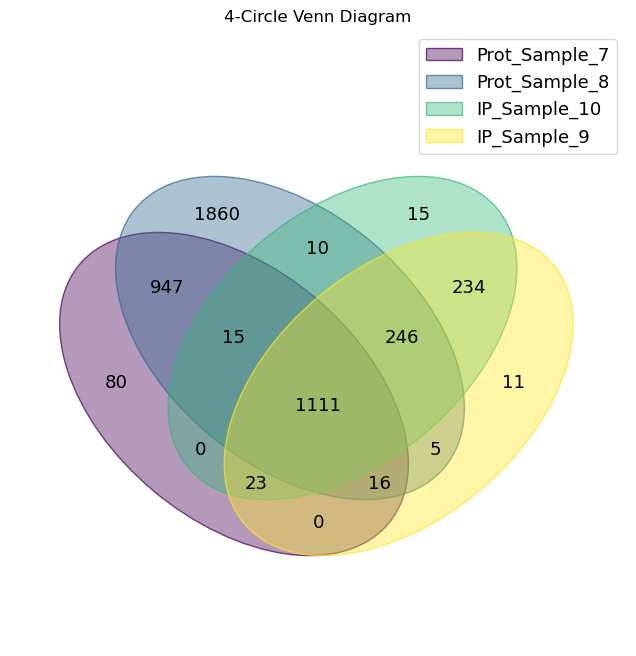

In [ ]:
# Convert each sample into a unique binary combination
df_outer['combination'] = df_outer.apply(lambda row: ''.join(row.astype(str)), axis=1)
comb_counts = df_outer['combination'].value_counts()

# Create sets for each column
sets = {
    'Prot_Sample_7': set(df_outer.index[df_outer['Prot_protein_intensity_sample_7'] == 1]),
    'Prot_Sample_8': set(df_outer.index[df_outer['Prot_protein_intensity_sample_8'] == 1]),
    'IP_Sample_10': set(df_outer.index[df_outer['IP_protein_intensity_sample_10'] == 1]),
    'IP_Sample_9': set(df_outer.index[df_outer['IP_protein_intensity_sample_9'] == 1])
}

# Create Venn diagram
fig, ax = plt.subplots(figsize=(6, 6))
venn(sets)
plt.title("4-Circle Venn Diagram")
plt.show()

In [49]:
df_outer.to_excel("df_outer.xlsx", index=False)